In [3]:
#hola! feel free to explore =)

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import VarianceThreshold 

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('images.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data_x = df.copy(deep=True)
data_x = data_x.drop(columns='label')
data_y = df['label']

In [6]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, train_size=0.8, random_state=0)

In [7]:
xy_train = x_train.copy(deep=True)
xy_train['y'] = y_train

In [8]:
def print_image(image_flat, ax=None):
    image = image_flat.reshape(28, 28).astype('uint8')
    if ax is None:
        plt.imshow(image)
    else:
        ax.axis('off')
        ax.imshow(image)

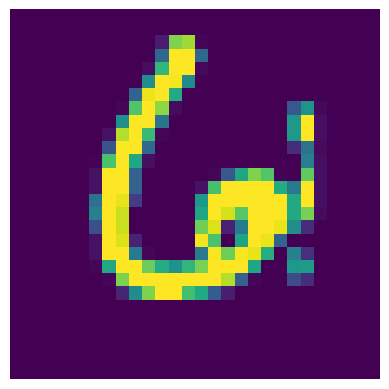

In [9]:
print_image(xy_train.values[0, :-1], ax=plt)

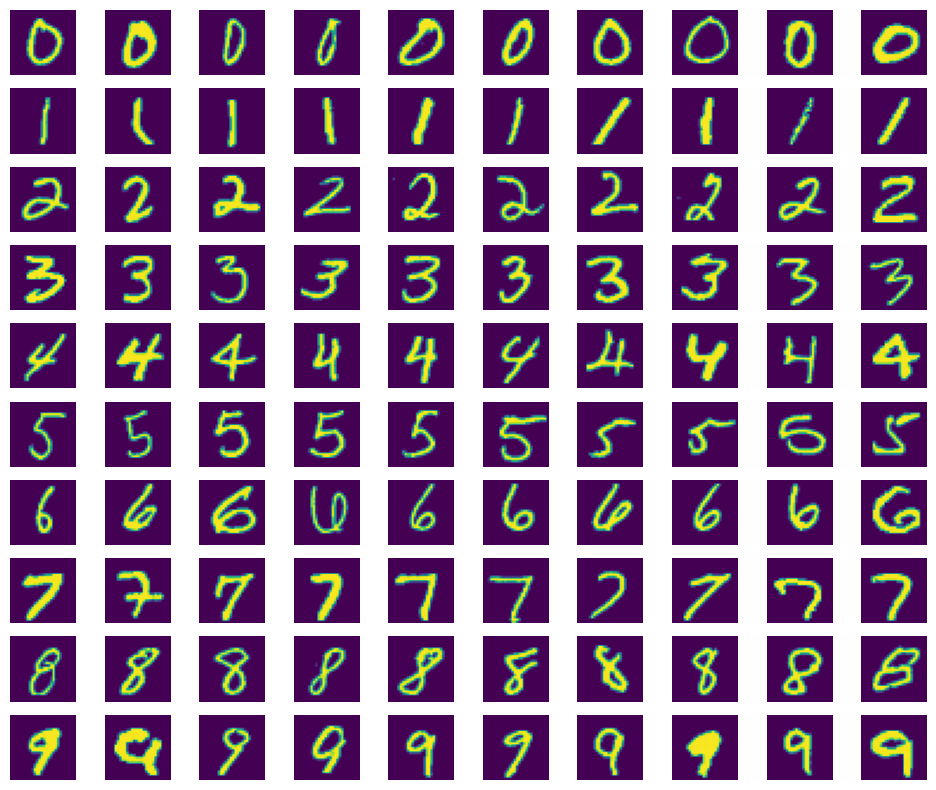

In [10]:
fig, axs = plt.subplots(10, 10, figsize=(12, 10),
                       sharex=True, sharey=True)
group_n = 0
for _, group in xy_train.groupby('y', as_index=False):
    random_nums = group.sample(10).drop(columns='y')
    image_vects = [x.values for _, x in random_nums.iterrows()]

    image_n = 0
    for image in image_vects:
        print_image(image, ax=axs[group_n][image_n])
        image_n += 1
    group_n += 1

In [11]:
x_train.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,33600.0,...,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.000000,33600.0,33600.0,33600.0,33600.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.227827,0.130268,0.064226,0.021429,0.021548,0.003571,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.578347,4.818621,3.437205,1.839529,2.118097,0.463160,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [12]:
description = x_train.describe()

<Axes: >

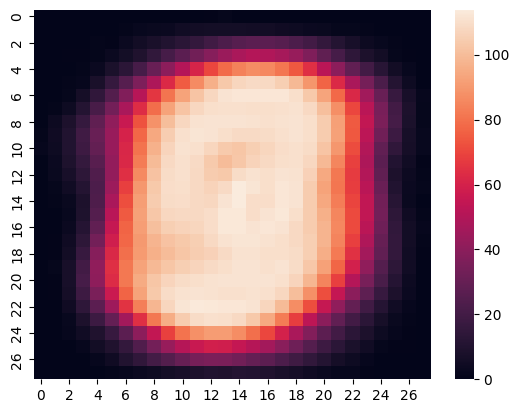

In [13]:
sns.heatmap(pd.DataFrame(description.loc['std'].values.reshape(28, 28)))

<Axes: >

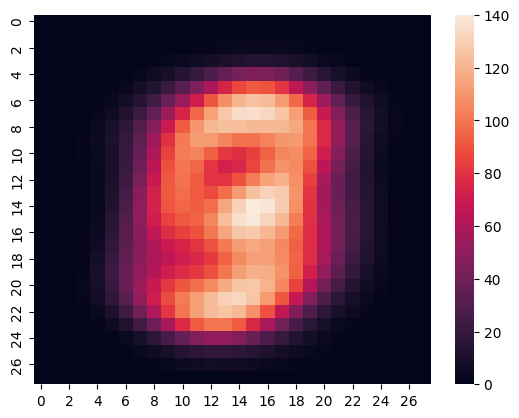

In [14]:
sns.heatmap(pd.DataFrame(x_train.mean().values.reshape(28, 28)))

In [15]:
selector = VarianceThreshold(threshold=0)
selector.fit(x_train)

useful_factors = selector.get_feature_names_out()
x_train = x_train[useful_factors]

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=0)

In [17]:
%%time
model_decision_tree = DecisionTreeClassifier(min_samples_leaf=10,
                              criterion='gini',
                              random_state=0)
model_decision_tree.fit(x_train, y_train)

CPU times: user 3.3 s, sys: 15.8 ms, total: 3.31 s
Wall time: 3.32 s


DecisionTreeClassifier(min_samples_leaf=10, random_state=0)

In [18]:
%%time
model_decision_forest = RandomForestClassifier(n_estimators=100,
                                              min_samples_leaf=3,
                                              max_features=int(len(list(x_train.columns)) ** (1/2)),
                                              criterion='gini',
                                              random_state=0)
model_decision_forest.fit(x_train, y_train)

CPU times: user 9.11 s, sys: 19 ms, total: 9.13 s
Wall time: 9.14 s


RandomForestClassifier(max_features=26, min_samples_leaf=3, random_state=0)

In [19]:
print(model_decision_tree.score(x_val, y_val))
print(model_decision_forest.score(x_val, y_val))

0.8419642857142857
0.9581845238095238


In [20]:
y_val_pred = model_decision_forest.predict(x_val)
print(precision_score(y_val, y_val_pred, average='micro')) # precision как отношение общего числа TP к общему числу TP и FP
print(precision_score(y_val, y_val_pred, average='macro')) # precision как среднее значение precision для всех классов

0.9581845238095238
0.9578345640013586


In [21]:
x_err = x_val[y_val_pred!=y_val]
y_err = y_val[y_val_pred!=y_val] 

In [22]:
xyy_err = x_err.copy(deep=True)
xyy_err['y'] = y_err
xyy_err['y_pred'] = y_val_pred[y_val_pred!=y_val]

In [23]:
xyy_err \
    .groupby(['y', 'y_pred'], as_index=False) \
    .agg({'pixel200': 'count'}) \
    .sort_values('pixel200', ascending=False) \
    .head(15)

,y,y_pred,pixel200
21,3,5,14
61,9,3,12
20,3,2,11
30,4,9,11
62,9,4,10
48,7,9,10
24,3,8,9
16,2,7,9
13,2,4,9
33,5,3,9


In [24]:
x_test = x_test[selector.get_feature_names_out()]

In [25]:
model_decision_forest.score(x_test, y_test)

0.9588095238095238

In [26]:
%%time

accs = []
precs = []
rcalls = []

xy_test = x_test.copy(deep=True)
xy_test['y'] = y_test

for i in range(1000):
    xy_boot = xy_test.sample(len(xy_test), replace=True)
    x_boot = xy_boot.drop(columns='y')
    y_boot = xy_boot['y']

    y_pred = model_decision_forest.predict(x_boot)

    accs.append(accuracy_score(y_boot, y_pred))
    precs.append(precision_score(y_boot, y_pred, average='micro'))
    rcalls.append(recall_score(y_boot, y_pred, average='macro'))

CPU times: user 1min 38s, sys: 5.57 s, total: 1min 44s
Wall time: 1min 44s


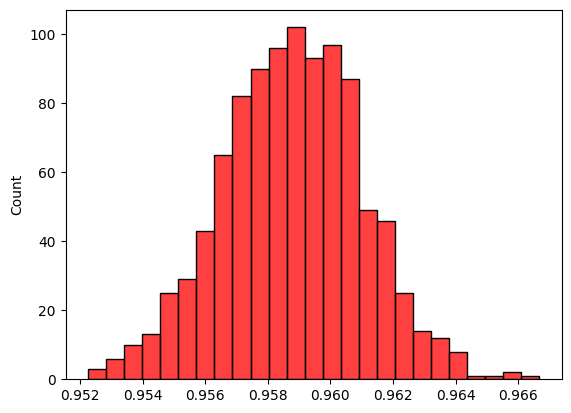

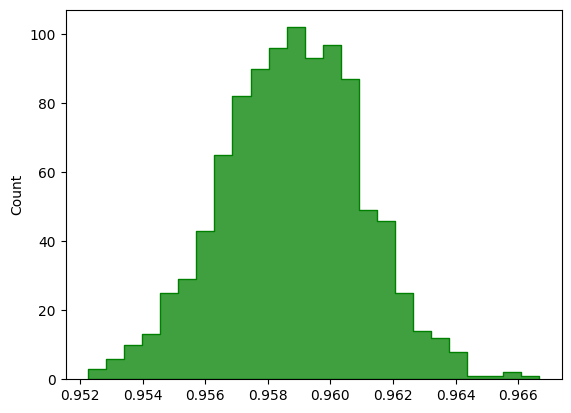

<Axes: ylabel='Count'>

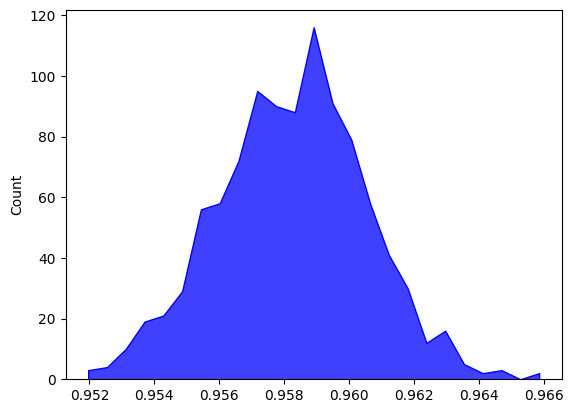

In [42]:
sns.histplot(accs, color="r")
plt.show()
sns.histplot(precs, color="g", element="step")
plt.show()
sns.histplot(rcalls, color="b", element="poly")

In [43]:
model_decision_tree.feature_names_in_[model_decision_tree.feature_importances_ > 0.01]

array(['pixel96', 'pixel155', 'pixel183', 'pixel239', 'pixel245',
       'pixel270', 'pixel290', 'pixel296', 'pixel322', 'pixel327',
       'pixel351', 'pixel375', 'pixel377', 'pixel406', 'pixel409',
       'pixel431', 'pixel434', 'pixel455', 'pixel485', 'pixel488',
       'pixel550', 'pixel569', 'pixel657'], dtype=object)

In [44]:
inds = [int(x[5:]) for x in model_decision_tree.feature_names_in_[model_decision_tree.feature_importances_ > 0.01]]

In [45]:
vect = np.array([(255 if i in inds else 0) for i in range(784)])

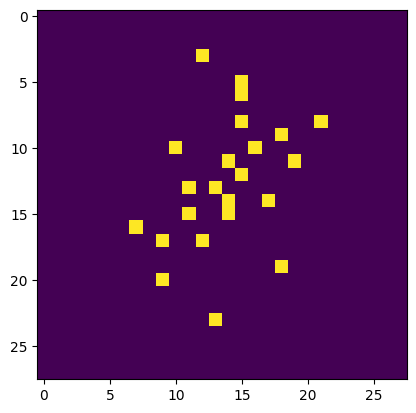

In [46]:
print_image(vect)